# SVM

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('heart.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [7]:
print(x)
# Encoding the categorical column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],
                      remainder='passthrough')
x = ct.fit_transform(x)
print('----------------------------------------------------------------------')
print(x)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
----------------------------------------------------------------------
[[ 0.  1. 63. ...  0.  0.  1.]
 [ 0.  1. 37. ...  0.  0.  2.]
 [ 1.  0. 41. ...  2.  0.  2.]
 ...
 [ 0.  1. 68. ...  1.  2.  3.]
 [ 0.  1. 57. ...  1.  1.  3.]
 [ 1.  0. 57. ...  1.  1.  2.]]


In [8]:
# copying x into x_copy while removing the dummy variable
x_copy = x[:,1:]
print(x_copy)

[[ 1. 63.  3. ...  0.  0.  1.]
 [ 1. 37.  2. ...  0.  0.  2.]
 [ 0. 41.  1. ...  2.  0.  2.]
 ...
 [ 1. 68.  0. ...  1.  2.  3.]
 [ 1. 57.  0. ...  1.  1.  3.]
 [ 0. 57.  1. ...  1.  1.  2.]]


In [9]:
# now to complete the euqation(y = a1x1 + a2x2 + ..... + anxn + b) 
# we need to add the constant column
b = np.ones((303,1),dtype=float)
print(b)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [10]:
# if we are adding two np arrays column wise we put axis = 1
# and if we add 2 np arrays rowwise we put axis = 0
x_copy = np.append(arr=b,values=x_copy,axis=1)
print(x_copy)

[[ 1.  1. 63. ...  0.  0.  1.]
 [ 1.  1. 37. ...  0.  0.  2.]
 [ 1.  0. 41. ...  2.  0.  2.]
 ...
 [ 1.  1. 68. ...  1.  2.  3.]
 [ 1.  1. 57. ...  1.  1.  3.]
 [ 1.  0. 57. ...  1.  1.  2.]]


In [11]:
# we apply feature scaling when the scales are different leaving the dummy
# variables
# splitting x and y into training and test size
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
# creating and training the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # this class automatically takes care of the dummy var.
lr.fit(x_tr,y_tr)

LinearRegression()

In [13]:
# predicting the output and checking for errors
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(x_te)
print(mean_absolute_error(y_te,y_pred))
print(mean_squared_error(y_te,y_pred))
print(r2_score(y_te,y_pred))

0.2981361736043102
0.13099093857047328
0.46904435466151306


In [14]:
import statsmodels.api as sm
# creating another variable to collect the most optimal columns of x
# we are performing manual BE
x_opt = np.array(x_copy[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]],dtype = float)
stat = sm.OLS(endog=y,exog=x_opt).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           1.49e-38
Time:                        20:13:00   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8289      0.293      2.830      0.005       0.252       1.405
x1            -0.1960      0.047     -4.157      0.000      -0.289      -0.103
x2            -0.0008      0.003     -0.304      0.761      -0.006       0.004
x3             0.1127      0.022      5.036      0.000       0.069       0.157
x4            -0.0020      0.001     -1.583      0.114      -0.004       0.000
x5            -0.0004      0.000     -0.838      0.403      -0.001       0.000
x6             0.0174      0.060      0.291      0.771      -0.100       0.135
x7             0.0498      0.040      1.249      0.213      -0.029       0.128
x8             0.0030      0.001      2.671      0.008       0.001       0.005
x9            -0.1440      0.051     -2.804      0.005      -0.245      -0.043
x10           -0.0588      0.023     -2.564      0.011      -0.104      -0.014
x11            0.0790      0.042      1.863      0.063      -0.004       0.162
x12           -0.1006      0.022     -4.603      0.000      -0.144      -0.058
x13           -0.1190      0.036     -3.339      0.001      -0.189      -0.049
==============================================================================
Omnibus:                        6.751   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.958
Skew:                          -0.361   Prob(JB):                       0.0308
Kurtosis:                       2.824   Cond. No.                     4.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# since we got the most significant column we can create a regression model
#we will start by splitting x_opt and y into training and test set
from sklearn.model_selection import train_test_split
xo_tr,xo_te,yo_tr,yo_te = train_test_split(x_opt,y,test_size=0.2,random_state=0)

In [16]:
# creating the optimal model prediciting and checking the r2_Score
from sklearn.linear_model import LinearRegression
lr_opt = LinearRegression()
lr_opt.fit(xo_tr,yo_tr)
yo_pr = lr_opt.predict(xo_te)
print(r2_score(yo_te,yo_pr))

0.4690443546615132


In [17]:
import statsmodels.api as sm
# creating another variable to collect the most optimal columns of x
# we are performing manual BE
x_opt = np.array(x_copy[:,[0,1,2,3,4,5,7,8,9,10,11,12,13]],dtype = float)
stat = sm.OLS(endog=y,exog=x_opt).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     25.91
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           2.98e-39
Time:                        20:13:00   Log-Likelihood:                -108.33
No. Observations:                 303   AIC:                             242.7
Df Residuals:                     290   BIC:                             290.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8218      0.291      2.820      0.005       0.248       1.395
x1            -0.1952      0.047     -4.154      0.000      -0.288      -0.103
x2            -0.0008      0.003     -0.287      0.775      -0.006       0.005
x3             0.1134      0.022      5.107      0.000       0.070       0.157
x4            -0.0019      0.001     -1.560      0.120      -0.004       0.001
x5            -0.0004      0.000     -0.843      0.400      -0.001       0.000
x6             0.0493      0.040      1.238      0.217      -0.029       0.128
x7             0.0030      0.001      2.688      0.008       0.001       0.005
x8            -0.1432      0.051     -2.797      0.006      -0.244      -0.042
x9            -0.0593      0.023     -2.602      0.010      -0.104      -0.014
x10            0.0780      0.042      1.849      0.065      -0.005       0.161
x11           -0.0997      0.022     -4.613      0.000      -0.142      -0.057
x12           -0.1196      0.036     -3.365      0.001      -0.190      -0.050
==============================================================================
Omnibus:                        6.917   Durbin-Watson:                   1.033
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.134
Skew:                          -0.365   Prob(JB):                       0.0282
Kurtosis:                       2.820   Cond. No.                     4.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
import statsmodels.api as sm
# creating another variable to collect the most optimal columns of x
# we are performing manual BE
x_opt = np.array(x_copy[:,[0,1,3,4,5,7,8,9,10,11,12,13]],dtype = float)
stat = sm.OLS(endog=y,exog=x_opt).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     28.35
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           5.67e-40
Time:                        20:13:00   Log-Likelihood:                -108.37
No. Observations:                 303   AIC:                             240.7
Df Residuals:                     291   BIC:                             285.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7787      0.249      3.124      0.002       0.288       1.269
x1            -0.1939      0.047     -4.153      0.000      -0.286      -0.102
x2             0.1131      0.022      5.107      0.000       0.069       0.157
x3            -0.0020      0.001     -1.678      0.094      -0.004       0.000
x4            -0.0004      0.000     -0.906      0.366      -0.001       0.000
x5             0.0500      0.040      1.259      0.209      -0.028       0.128
x6             0.0032      0.001      3.009      0.003       0.001       0.005
x7            -0.1421      0.051     -2.788      0.006      -0.242      -0.042
x8            -0.0595      0.023     -2.614      0.009      -0.104      -0.015
x9             0.0778      0.042      1.848      0.066      -0.005       0.161
x10           -0.1010      0.021     -4.771      0.000      -0.143      -0.059
x11           -0.1198      0.035     -3.375      0.001      -0.190      -0.050
==============================================================================
Omnibus:                        7.163   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.400
Skew:                          -0.373   Prob(JB):                       0.0247
Kurtosis:                       2.826   Cond. No.                     3.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
import statsmodels.api as sm
# creating another variable to collect the most optimal columns of x
# we are performing manual BE
x_opt = np.array(x_copy[:,[0,1,3,4,7,8,9,10,11,12,13]],dtype = float)
stat = sm.OLS(endog=y,exog=x_opt).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     31.12
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           1.47e-40
Time:                        20:13:00   Log-Likelihood:                -108.80
No. Observations:                 303   AIC:                             239.6
Df Residuals:                     292   BIC:                             280.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7053      0.236      2.993      0.003       0.242       1.169
x1            -0.1837      0.045     -4.055      0.000      -0.273      -0.095
x2             0.1140      0.022      5.156      0.000       0.070       0.157
x3            -0.0021      0.001     -1.758      0.080      -0.004       0.000
x4             0.0555      0.039      1.416      0.158      -0.022       0.133
x5             0.0031      0.001      2.981      0.003       0.001       0.005
x6            -0.1444      0.051     -2.835      0.005      -0.245      -0.044
x7            -0.0602      0.023     -2.646      0.009      -0.105      -0.015
x8             0.0761      0.042      1.808      0.072      -0.007       0.159
x9            -0.1019      0.021     -4.825      0.000      -0.144      -0.060
x10           -0.1235      0.035     -3.505      0.001      -0.193      -0.054
==============================================================================
Omnibus:                        7.375   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.623
Skew:                          -0.383   Prob(JB):                       0.0221
Kurtosis:                       2.867   Cond. No.                     2.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
import statsmodels.api as sm
# creating another variable to collect the most optimal columns of x
# we are performing manual BE
x_opt = np.array(x_copy[:,[0,1,3,4,8,9,10,11,12,13]],dtype = float)
stat = sm.OLS(endog=y,exog=x_opt).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     34.24
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           6.44e-41
Time:                        20:13:00   Log-Likelihood:                -109.83
No. Observations:                 303   AIC:                             239.7
Df Residuals:                     293   BIC:                             276.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7555      0.233      3.237      0.001       0.296       1.215
x1            -0.1874      0.045     -4.136      0.000      -0.277      -0.098
x2             0.1147      0.022      5.182      0.000       0.071       0.158
x3            -0.0023      0.001     -1.916      0.056      -0.005    6.18e-05
x4             0.0031      0.001      2.955      0.003       0.001       0.005
x5            -0.1467      0.051     -2.878      0.004      -0.247      -0.046
x6            -0.0593      0.023     -2.604      0.010      -0.104      -0.014
x7             0.0804      0.042      1.912      0.057      -0.002       0.163
x8            -0.1035      0.021     -4.895      0.000      -0.145      -0.062
x9            -0.1222      0.035     -3.463      0.001      -0.192      -0.053
==============================================================================
Omnibus:                        6.829   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.006
Skew:                          -0.369   Prob(JB):                       0.0301
Kurtosis:                       2.906   Cond. No.                     2.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
import statsmodels.api as sm
# creating another variable to collect the most optimal columns of x
# we are performing manual BE
x_opt = np.array(x_copy[:,[0,1,3,4,8,9,10,12,13]],dtype = float)
stat = sm.OLS(endog=y,exog=x_opt).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     37.72
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           5.98e-41
Time:                        20:13:00   Log-Likelihood:                -111.71
No. Observations:                 303   AIC:                             241.4
Df Residuals:                     294   BIC:                             274.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8221      0.232      3.547      0.000       0.366       1.278
x1            -0.1852      0.046     -4.070      0.000      -0.275      -0.096
x2             0.1136      0.022      5.112      0.000       0.070       0.157
x3            -0.0023      0.001     -1.945      0.053      -0.005    2.74e-05
x4             0.0036      0.001      3.482      0.001       0.002       0.006
x5            -0.1521      0.051     -2.975      0.003      -0.253      -0.051
x6            -0.0811      0.020     -4.095      0.000      -0.120      -0.042
x7            -0.0997      0.021     -4.715      0.000      -0.141      -0.058
x8            -0.1209      0.035     -3.413      0.001      -0.191      -0.051
==============================================================================
Omnibus:                        7.546   Durbin-Watson:                   1.019
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.811
Skew:                          -0.387   Prob(JB):                       0.0201
Kurtosis:                       2.859   Cond. No.                     2.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
import statsmodels.api as sm
# creating another variable to collect the most optimal columns of x
# we are performing manual BE
x_opt = np.array(x_copy[:,[0,1,3,8,9,10,12,13]],dtype = float)
stat = sm.OLS(endog=y,exog=x_opt).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     42.17
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           5.58e-41
Time:                        20:13:00   Log-Likelihood:                -113.65
No. Observations:                 303   AIC:                             243.3
Df Residuals:                     295   BIC:                             273.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5365      0.180      2.977      0.003       0.182       0.891
x1            -0.1769      0.046     -3.886      0.000      -0.266      -0.087
x2             0.1093      0.022      4.919      0.000       0.066       0.153
x3             0.0035      0.001      3.423      0.001       0.001       0.006
x4            -0.1576      0.051     -3.074      0.002      -0.259      -0.057
x5            -0.0875      0.020     -4.462      0.000      -0.126      -0.049
x6            -0.1030      0.021     -4.868      0.000      -0.145      -0.061
x7            -0.1235      0.036     -3.471      0.001      -0.193      -0.053
==============================================================================
Omnibus:                        7.758   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.998
Skew:                          -0.396   Prob(JB):                       0.0183
Kurtosis:                       2.918   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
import statsmodels.api as sm
# creating another variable to collect the most optimal columns of x
# we are performing manual BE
x_opt = np.array(x_copy[:,[1,3,8,9,10,12,13]],dtype = float)
stat = sm.OLS(endog=y,exog=x_opt).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              138.0
Date:                Fri, 11 Jun 2021   Prob (F-statistic):                    2.56e-89
Time:                        20:13:00   Log-Likelihood:                         -118.13
No. Observations:                 303   AIC:                                      250.3
Df Residuals:                     296   BIC:                                      276.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1706      0.046     -3.705      0.000      -0.261      -0.080
x2             0.1129      0.022      5.024      0.000       0.069       0.157
x3             0.0062      0.001     12.091      0.000       0.005       0.007
x4            -0.1178      0.050     -2.349      0.020      -0.217      -0.019
x5            -0.0745      0.019     -3.846      0.000      -0.113      -0.036
x6            -0.0941      0.021     -4.431      0.000      -0.136      -0.052
x7            -0.0847      0.034     -2.524      0.012      -0.151      -0.019
==============================================================================
Omnibus:                        7.273   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.429
Skew:                          -0.383   Prob(JB):                       0.0244
Kurtosis:                       2.951   Cond. No.                         382.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
import statsmodels.api as sm
# creating another variable to collect the most optimal columns of x
# we are performing manual BE
x_opt = np.array(x_copy[:,[1,3,8,10,12,13]],dtype = float)
stat = sm.OLS(endog=y,exog=x_opt).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              157.7
Date:                Fri, 11 Jun 2021   Prob (F-statistic):                    2.96e-89
Time:                        20:13:00   Log-Likelihood:                         -120.93
No. Observations:                 303   AIC:                                      253.9
Df Residuals:                     297   BIC:                                      276.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1833      0.046     -3.975      0.000      -0.274      -0.093
x2             0.1289      0.022      5.966      0.000       0.086       0.171
x3             0.0062      0.001     12.100      0.000       0.005       0.007
x4            -0.0847      0.019     -4.451      0.000      -0.122      -0.047
x5            -0.0934      0.021     -4.367      0.000      -0.135      -0.051
x6            -0.1022      0.033     -3.103      0.002      -0.167      -0.037
==============================================================================
Omnibus:                        6.202   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.375
Skew:                          -0.346   Prob(JB):                       0.0413
Kurtosis:                       2.835   Cond. No.                         342.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# In order to get down to 2 features we remove the extra features and proceed with svm algorithm
import statsmodels.api as sm
# creating another variable to collect the most optimal columns of x
# we are performing manual BE
x_opt = np.array(x_copy[:,[1,3,8,10,12]],dtype = float)
stat = sm.OLS(endog=y,exog=x_opt).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              182.1
Date:                Fri, 11 Jun 2021   Prob (F-statistic):                    2.33e-88
Time:                        20:13:00   Log-Likelihood:                         -125.76
No. Observations:                 303   AIC:                                      261.5
Df Residuals:                     298   BIC:                                      280.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2172      0.045     -4.781      0.000      -0.307      -0.128
x2             0.1384      0.022      6.385      0.000       0.096       0.181
x3             0.0049      0.000     16.034      0.000       0.004       0.006
x4            -0.1030      0.018     -5.610      0.000      -0.139      -0.067
x5            -0.1031      0.021     -4.802      0.000      -0.145      -0.061
==============================================================================
Omnibus:                        7.384   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.385
Skew:                          -0.351   Prob(JB):                       0.0249
Kurtosis:                       2.697   Cond. No.                         325.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# taking feature 1 & 3 
import statsmodels.api as sm
# creating another variable to collect the most optimal columns of x
# we are performing manual BE
x_opt = np.array(x_copy[:,[3,13]],dtype = float)
stat = sm.OLS(endog=y,exog=x_opt).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.583
Model:                            OLS   Adj. R-squared (uncentered):              0.580
Method:                 Least Squares   F-statistic:                              210.4
Date:                Fri, 11 Jun 2021   Prob (F-statistic):                    6.73e-58
Time:                        20:13:00   Log-Likelihood:                         -205.34
No. Observations:                 303   AIC:                                      414.7
Df Residuals:                     301   BIC:                                      422.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2653      0.025     10.581      0.000       0.216       0.315
x2             0.1028      0.015      6.945      0.000       0.074       0.132
==============================================================================
Omnibus:                       13.701   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.921
Skew:                          -0.149   Prob(JB):                       0.0314
Kurtosis:                       2.323   Cond. No.                         2.55
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# since we got the most significant column we can create a regression model
#we will start by splitting x_opt and y into training and test set
from sklearn.model_selection import train_test_split
xo_tr,xo_te,yo_tr,yo_te = train_test_split(x_opt,y,test_size=0.2,random_state=0)

In [28]:
# creating the optimal model prediciting and checking the r2_Score
from sklearn.linear_model import LinearRegression
lr_opt = LinearRegression()
lr_opt.fit(xo_tr,yo_tr)
yo_pr = lr_opt.predict(xo_te)
print(r2_score(yo_te,yo_pr))

0.35454698682309893


In [29]:
from sklearn.svm import SVC
cl=SVC(kernel='linear',random_state=0)
cl.fit(xo_tr,yo_tr)

SVC(kernel='linear', random_state=0)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
yo_pr=cl.predict(xo_te)
print(accuracy_score(yo_pr,yo_te))

0.8032786885245902


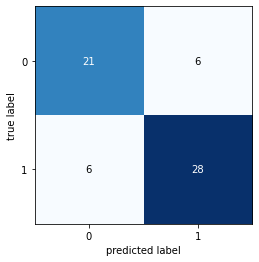

In [31]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
cm=confusion_matrix(yo_te,yo_pr)
plot_confusion_matrix(cm)
plt.show()

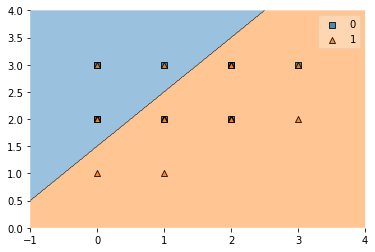

In [32]:
plot_decision_regions(X=xo_te,y=yo_te,clf=cl)
plt.show()

# Inference

## 1) In this code, we first do the necessary eda and data preprocessing by checking for the missing values. The dataset contains no empty values.
## 2) We check for the categorical column and encode them.
## 3) We prepare the x and y for backward elimination to remove the extra features from the    dataset. Thus, we reduce the dimensionality to 2 features only in order to escape for the filler feature values during plotting of decision regions of confusion matrix.
## 4) After backward eliminating manually, we train the dataset using the test values.
## 5) We predict the accuracy score of the svm classification model using linear kernel which is 80.32%
## 6) Then, we plot the confusion matrix for the same dataset values as above.
## 7) Atlast, we plot the decision regions for 0's and 1's.